<a href="https://colab.research.google.com/github/TiaoWa1/CIC-Darknet2020-ML/blob/main/CIC_Darknet2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers,utils
from tensorflow.keras.utils import plot_model
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset/Darknet.csv")
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


In [ ]:
# Feature processing
Feature = data.drop("Label", axis = 1)
Feature = Feature.drop("Label.1", axis = 1)
non_numeric_cols = Feature.select_dtypes(exclude=[np.number]).columns
for i in non_numeric_cols:
  LE = LabelEncoder()
  Feature[i] = LE.fit_transform(Feature[i])
Feature.replace([np.inf, -np.inf], np.nan, inplace=True)
Feature.fillna(Feature.mean(), inplace=True)
SS = StandardScaler()
Feature = SS.fit_transform(Feature)

In [ ]:
# Label processing
L1_encoder = LabelEncoder()
Label_1 = L1_encoder.fit_transform(data["Label"])
Label_1 = utils.to_categorical(Label_1)
L2_encoder = LabelEncoder()
Label_2 = L2_encoder.fit_transform(data["Label.1"])
Label_2 = utils.to_categorical(Label_2)

0    110442
1     23863
3     22919
2      1392
Name: count, dtype: int64
7     48520
2     46457
1     19830
3     11629
5     11098
9      9486
4      6145
8      3566
0      1520
10      281
6        84
Name: count, dtype: int64


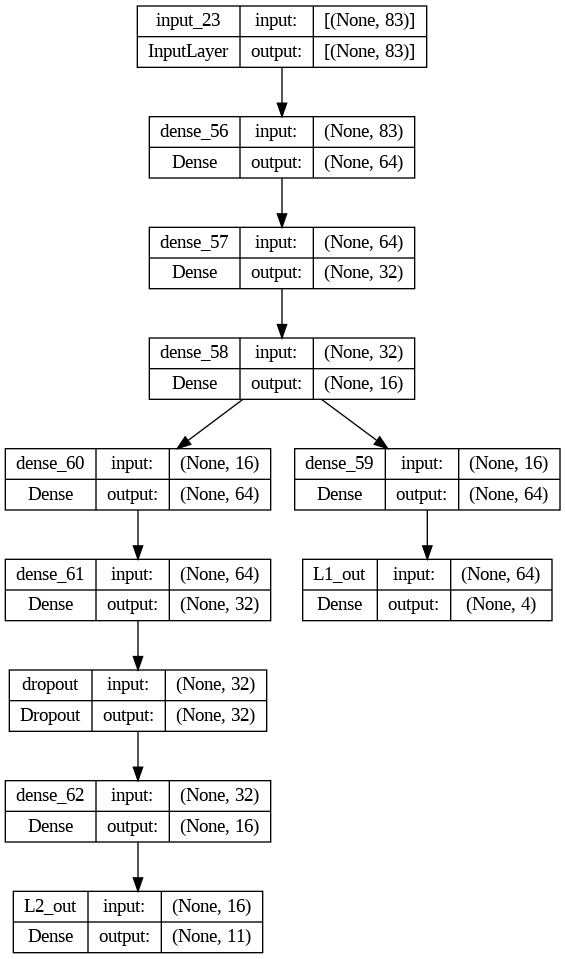

In [ ]:
input_layer = keras.Input(shape = (83,))

hidden_1 = layers.Dense(units = 64, activation = 'relu')(input_layer)
hidden_2 = layers.Dense(units = 32, activation = 'relu')(hidden_1)
hidden_3 = layers.Dense(units = 16, activation = 'relu')(hidden_2)

L1_hidden = layers.Dense(units = 64, activation = 'relu')(hidden_3)
L2_hidden_1 = layers.Dense(units = 64, activation = 'relu')(hidden_3)
L2_hidden_2 = layers.Dense(units = 32, activation = 'relu')(L2_hidden_1)
Drop = layers.Dropout(0.3)(L2_hidden_2)
L2_hidden_3 = layers.Dense(units = 16, activation = 'relu')(Drop)

L1_output = layers.Dense(units = 4, activation = 'softmax', name = 'L1_out')(L1_hidden)
L2_output = layers.Dense(units = 11, activation = 'softmax', name = 'L2_out')(L2_hidden_3)

model = keras.Model(inputs = input_layer, outputs = [L1_output, L2_output])
plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam',
       loss={'L1_out':'categorical_crossentropy',
          'L2_out':'categorical_crossentropy'},
       metrics={'L1_out':['accuracy'],'L2_out':['accuracy']})

In [ ]:
train_history = model.fit(Feature, [Label_1, Label_2], validation_split=0.1, epochs=20, batch_size=256, verbose=1)

Epoch 1/20
558/558 [==============================] - 12s 15ms/step - loss: 1.1340 - L1_out_loss: 0.1874 - L2_out_loss: 0.9466 - L1_out_accuracy: 0.9353 - L2_out_accuracy: 0.6813 - val_loss: 1.9640 - val_L1_out_loss: 0.8314 - val_L2_out_loss: 1.1326 - val_L1_out_accuracy: 0.7259 - val_L2_out_accuracy: 0.5193
Epoch 2/20
558/558 [==============================] - 4s 6ms/step - loss: 0.5546 - L1_out_loss: 0.0453 - L2_out_loss: 0.5094 - L1_out_accuracy: 0.9865 - L2_out_accuracy: 0.8097 - val_loss: 2.0093 - val_L1_out_loss: 0.8555 - val_L2_out_loss: 1.1537 - val_L1_out_accuracy: 0.7845 - val_L2_out_accuracy: 0.6710
Epoch 3/20
558/558 [==============================] - 3s 6ms/step - loss: 0.4300 - L1_out_loss: 0.0254 - L2_out_loss: 0.4045 - L1_out_accuracy: 0.9932 - L2_out_accuracy: 0.8516 - val_loss: 1.8756 - val_L1_out_loss: 0.6873 - val_L2_out_loss: 1.1883 - val_L1_out_accuracy: 0.8532 - val_L2_out_accuracy: 0.7067
Epoch 4/20
558/558 [==============================] - 4s 7ms/step - loss: 

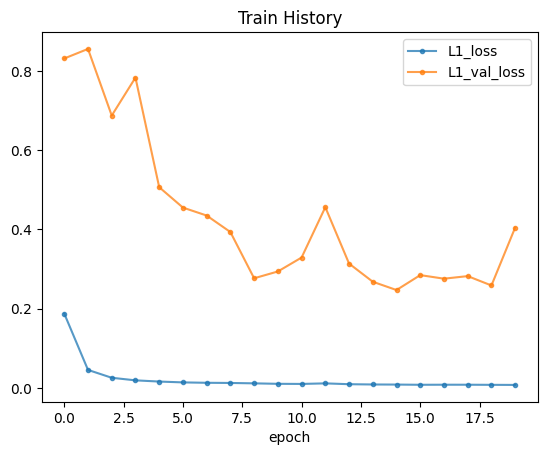

In [ ]:
plt.title("Train History")
plt.plot(train_history.history['L1_out_loss'],marker='.',alpha=0.75)
plt.plot(train_history.history['val_L1_out_loss'],marker='.',alpha=0.75)
plt.xlabel("epoch")
plt.legend(["L1_loss","L1_val_loss"])
plt.show()

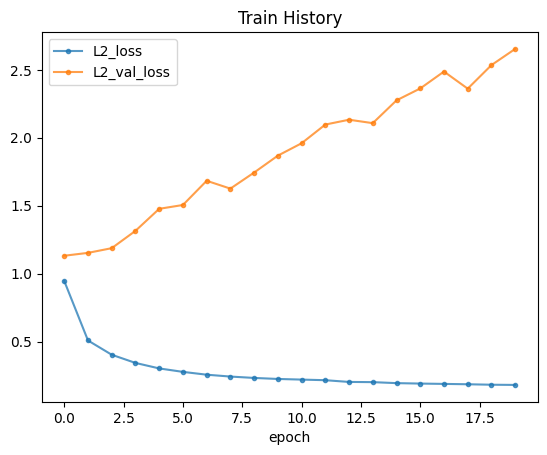

In [ ]:
plt.title("Train History")
plt.plot(train_history.history['L2_out_loss'],marker='.',alpha=0.75)
plt.plot(train_history.history['val_L2_out_loss'],marker='.',alpha=0.75)
plt.xlabel("epoch")
plt.legend(["L2_loss","L2_val_loss"])
plt.show()